<a href="https://colab.research.google.com/github/szakmarynandor/FAKT-MLCourse/blob/main/weather_forecast_hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Időjárás előrejelzés - 3. házi feladat

In [351]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import keras

In [352]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Adatok importálása

In [353]:
#Szolnok adatait akartam, de valamiért a londonit töltötte le, úgyhogy ezzel dolgozok
weather_h = pd.read_csv('/content/drive/My Drive/FAKT_ML/weather_data_1hr.csv')
weather_d = pd.read_csv('/content/drive/My Drive/FAKT_ML/weather_data_24hr.csv')
weather_m = pd.read_csv('/content/drive/My Drive/FAKT_ML/monthly_averages.csv')
weather_y = pd.read_csv('/content/drive/My Drive/FAKT_ML/yearly_monthly_averages.csv')

In [354]:
print(weather_h.shape)
print(weather_d.shape)
print(weather_m.shape)
print(weather_y.shape)

(1464, 31)
(61, 38)
(12, 35)
(132, 29)


In [355]:
weather_y.head().T

,0,1,2,3,4
loc_id,1.00,1.00,1.00,1.00,1.00
year,2009.00,2009.00,2009.00,2009.00,2009.00
month,1.00,2.00,3.00,4.00,5.00
maxtempC,5.00,6.00,11.00,15.00,17.00
maxtempF,41.00,44.00,52.00,59.00,63.00
mintempC,0.00,2.00,3.00,5.00,8.00
mintempF,32.00,35.00,37.00,42.00,46.00
avgtempC,2.00,4.00,6.00,10.00,13.00
avgtempF,36.00,39.00,44.00,50.00,55.00
rainMM,20.82,31.20,17.17,32.18,19.36


In [356]:
weather_h.head().T

,0,1,2,3,4
loc_id,1,1,1,1,1
date,2019-06-01,2019-06-01,2019-06-01,2019-06-01,2019-06-01
time,0,100,200,300,400
isdaytime,no,no,no,no,no
tempC,16,16,15,15,15
tempF,61,60,59,58,59
windspeedMiles,6,6,5,5,4
windspeedKmph,10,9,9,8,7
winddirdegree,228,230,233,235,229
winddir16point,SW,SW,SW,SW,SW


###Hiányzó adatok ellenőrzése

In [357]:
weather_h.isna().sum() #nincs hiányzó adat

loc_id             0
date               0
time               0
isdaytime          0
tempC              0
tempF              0
windspeedMiles     0
windspeedKmph      0
winddirdegree      0
winddir16point     0
weatherCode        0
weatherIconUrl     0
weatherDesc        0
precipMM           0
precipInches       0
humidity           0
visibilityKm       0
visibilityMiles    0
pressureMB         0
pressureInches     0
cloudcover         0
HeatIndexC         0
HeatIndexF         0
DewPointC          0
DewPointF          0
WindChillC         0
WindChillF         0
WindGustMiles      0
WindGustKmph       0
FeelsLikeC         0
FeelsLikeF         0
dtype: int64

In [358]:
weather_y.isna().sum() #nincs hiányzó adat

loc_id               0
year                 0
month                0
maxtempC             0
maxtempF             0
mintempC             0
mintempF             0
avgtempC             0
avgtempF             0
rainMM               0
rainInches           0
rain_days            0
snow_cm              0
snow_days            0
maxwindspeedMiles    0
maxwindspeedKmph     0
avgwindspeedMiles    0
avgwindspeedKmph     0
avgwindgustMiles     0
avgwindgustKmph      0
visibilityKm         0
visibilityMiles      0
humidity             0
pressureMB           0
pressureInches       0
cloudcover           0
sun_hour             0
sun_days             0
uvindex              0
dtype: int64

###Felesleges változók elhagyása

In [359]:
weather_h = weather_h.drop(columns = ['loc_id', 'date', 'isdaytime', 'tempF', 'windspeedMiles', 'weatherIconUrl', 'precipInches', 'visibilityMiles', 
                            'pressureInches', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF'])

In [360]:
weather_h.head().T

,0,1,2,3,4
time,0,100,200,300,400
tempC,16,16,15,15,15
windspeedKmph,10,9,9,8,7
winddirdegree,228,230,233,235,229
winddir16point,SW,SW,SW,SW,SW
weatherCode,116,116,116,116,116
weatherDesc,Partly cloudy,Partly cloudy,Partly cloudy,Partly cloudy,Partly cloudy
precipMM,0.0,0.0,0.0,0.0,0.0
humidity,77,78,79,79,77
visibilityKm,10,10,10,10,10


In [361]:
weather_y=weather_y.drop(columns=['loc_id','year','month','maxtempF','mintempF','avgtempF','rainInches','maxwindspeedMiles','avgwindspeedMiles',
                                  'avgwindgustMiles','visibilityMiles', 'pressureMB'])

In [362]:
weather_y.head().T

,0,1,2,3,4
maxtempC,5.00,6.0,11.00,15.00,17.00
mintempC,0.00,2.0,3.00,5.00,8.00
avgtempC,2.00,4.0,6.00,10.00,13.00
rainMM,20.82,31.2,17.17,32.18,19.36
rain_days,8.00,12.0,8.00,12.00,10.00
snow_cm,0.20,3.2,0.10,0.00,0.00
snow_days,2.00,5.0,1.00,0.00,0.00
maxwindspeedKmph,16.30,13.3,14.40,10.70,14.30
avgwindspeedKmph,16.30,13.3,14.40,10.70,14.30
avgwindgustKmph,27.60,21.5,22.70,16.00,20.30


###Kategóriaváltozók átalakítása

In [363]:
laberer=LabelEncoder()
weather_h.winddir16point=laberer.fit_transform(weather_h.winddir16point)
weather_h.weatherDesc=laberer.fit_transform(weather_h.weatherDesc)
weather_h.head()

,time,tempC,windspeedKmph,winddirdegree,winddir16point,weatherCode,weatherDesc,precipMM,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
0,0,16,10,228,12,116,11,0.0,77,10,1023,7,16,12,16,12,16
1,100,16,9,230,12,116,11,0.0,78,10,1023,6,16,12,16,11,16
2,200,15,9,233,12,116,11,0.0,79,10,1022,5,15,11,15,10,15
3,300,15,8,235,12,116,11,0.0,79,10,1022,4,15,11,14,9,14
4,400,15,7,229,12,116,11,0.0,77,10,1022,4,15,11,15,8,15


####Eredmény- és magyarázó jellegű változók szétválasztása

In [364]:
weather_h_y=weather_h['tempC'].copy()
weather_h_y=weather_h_y.drop(0, axis=0)
weather_h_y.shape

(1463,)

In [365]:
weather_h_x=weather_h.copy().drop('tempC',axis=1)
weather_h_x=weather_h_x.drop(axis=0,index=(weather_h_x.shape[0]-1))
weather_h_x.shape

(1463, 16)

In [366]:
x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(weather_h_x, weather_h_y, test_size=0.1, shuffle=True)

In [367]:
x_train_h.shape

(1316, 16)

###Adatok normalizálása

In [368]:
normalizer=StandardScaler()
normalizer.fit(x_train_h)
x_train_h = normalizer.transform(x_train_h)
x_test_h = normalizer.transform(x_test_h)

In [369]:
###Architektúra létrehozása

In [370]:
input = Input(shape=(x_train_h.shape[1]))
x= Dense(32, activation='relu')(input)
x= Dense(64, activation='relu')(x)
x= Dense(64, activation='relu')(x)
output = Dense(1, activation = 'linear')(x)

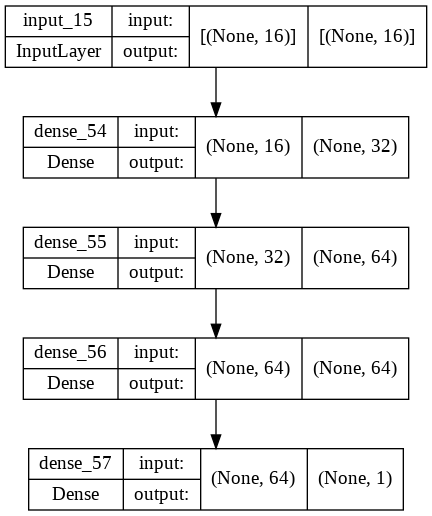

In [371]:
model_h = keras.Model(input, output)
plot_model(model_h, show_shapes=True)

In [372]:
model_h.compile(optimizer='adam', loss='MSE', metrics=['MeanSquaredError'])
early_stopping_callback = EarlyStopping(patience=12, restore_best_weights=True)
model_h.fit(x_train_h, y_train_h, batch_size=64, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback])

Epoch 1/500
19/19 [==============================] - 1s 12ms/step - loss: 306.0600 - mean_squared_error: 306.0600 - val_loss: 227.4295 - val_mean_squared_error: 227.4295
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 156.4344 - mean_squared_error: 156.4344 - val_loss: 58.3910 - val_mean_squared_error: 58.3910
Epoch 3/500
19/19 [==============================] - 0s 5ms/step - loss: 42.6699 - mean_squared_error: 42.6699 - val_loss: 33.4496 - val_mean_squared_error: 33.4496
Epoch 4/500
19/19 [==============================] - 0s 5ms/step - loss: 22.8245 - mean_squared_error: 22.8245 - val_loss: 15.8764 - val_mean_squared_error: 15.8764
Epoch 5/500
19/19 [==============================] - 0s 6ms/step - loss: 14.5704 - mean_squared_error: 14.5704 - val_loss: 12.4361 - val_mean_squared_error: 12.4361
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 11.6695 - mean_squared_error: 11.6695 - val_loss: 9.7203 - val_mean_squared_error: 9.7203
Epoch

In [373]:
prediction_h=model_h.predict(x_test_h[:1])
prediction_h

array([[19.848396]], dtype=float32)

In [374]:
weather_h['tempC'].iloc[-1]

18

#####Egészen közel van a predikciónk a valóshoz :)

###Előrejelzés egy napra

In [375]:
weather_d.shape

(61, 38)

In [376]:
weather_d.head().T

,0,1,2,3,4
loc_id,1,1,1,1,1
date,2019-06-01,2019-06-02,2019-06-03,2019-06-04,2019-06-05
maxtempC,26,24,20,17,19
maxtempF,78,75,68,63,66
mintempC,15,17,14,14,13
mintempF,58,62,56,56,55
avgtempC,22,22,18,16,17
avgtempF,72,71,64,62,62
totalprecipMM,0.0,0.5,0.5,10.7,0.1
totalprecipIn,0.0,0.02,0.02,0.42,0.0


####Felesleges változók elhagyása

In [377]:
weather_d=weather_d.drop(columns=['loc_id','date','maxtempF','mintempF','avgtempF','totalprecipIn','windspeedMiles','winddir16point',
                                  'weatherIconUrl','weatherDesc', 'visibilityMiles','pressureInches','HeatIndexF','DewPointF','WindChillF',
                                  'WindGustMiles','FeelsLikeF'])
print(weather_d.columns)

Index(['maxtempC', 'mintempC', 'avgtempC', 'totalprecipMM', 'windspeedKmph',
       'sunhour', 'winddirdegree', 'weatherCode', 'humidity', 'visibilityKm',
       'pressureMB', 'cloudcover', 'HeatIndexC', 'DewPointC', 'WindChillC',
       'WindGustKmph', 'FeelsLikeC', 'sunrise', 'sunset', 'moonrise',
       'moonset'],
      dtype='object')


In [378]:
print(weather_d.columns)

Index(['maxtempC', 'mintempC', 'avgtempC', 'totalprecipMM', 'windspeedKmph',
       'sunhour', 'winddirdegree', 'weatherCode', 'humidity', 'visibilityKm',
       'pressureMB', 'cloudcover', 'HeatIndexC', 'DewPointC', 'WindChillC',
       'WindGustKmph', 'FeelsLikeC', 'sunrise', 'sunset', 'moonrise',
       'moonset'],
      dtype='object')


####Eredményváltozó kimentése külön df-be

In [379]:
weather_d_y=weather_d['avgtempC'].copy()
weather_d_y=weather_d_y.drop(0, axis=0)
weather_d_y.shape

(60,)

In [380]:
#x-ek kimentése
weather_d_x=weather_d.copy().drop('avgtempC',axis=1)
weather_d_x=weather_d_x.drop(axis=0,index=(weather_d_x.shape[0]-1))
weather_d_x.shape

(60, 20)

######Sok változó, nagyon kevés megfigyelés, így biztos túltanulna a modell, nem hiszem, hogy sok értelme lenne folytatni, inkább hagyjuk.

###Egy évre

In [388]:
print(weather_y.shape)
print(weather_y.columns)

(132, 17)
Index(['maxtempC', 'mintempC', 'avgtempC', 'rainMM', 'rain_days', 'snow_cm',
       'snow_days', 'maxwindspeedKmph', 'avgwindspeedKmph', 'avgwindgustKmph',
       'visibilityKm', 'humidity', 'pressureInches', 'cloudcover', 'sun_hour',
       'sun_days', 'uvindex'],
      dtype='object')


In [389]:
weather_y_y=weather_y['avgtempC'].copy()
weather_y_y=weather_y_y.drop(0, axis=0)
weather_y_y.shape

(131,)

In [390]:
weather_y_x=weather_y.copy().drop('avgtempC',axis=1)
weather_y_x=weather_y_x.drop(axis=0,index=(weather_y_x.shape[0]-1))
weather_y_x.shape #ebben sincs túl sok adat, de próbáljuk meg

(131, 16)

In [405]:
x_train_y, x_test_y, y_train_y, y_test_y = train_test_split(weather_y_x, weather_y_y, test_size=0.1, shuffle=True)

####Normalizáljuk a változókat itt is

In [406]:
normalizer.fit(x_train_y)
x_train_y=normalizer.transform(x_train_y)
x_test_y = normalizer.transform(x_test_y)
pd.DataFrame(x_train_y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.401552,0.359547,1.282294,1.469307,-0.222530,0.153126,1.747177,0.335593,0.059640,0.244851,-0.493618,-0.292089,0.074161,-1.019877,-1.079180,-0.180664
1,0.794343,0.793227,1.641986,1.839801,-0.300250,-0.358753,-1.056851,-1.011383,-0.865992,-0.710068,0.643258,-0.292089,1.025050,0.134461,-1.649650,-0.180664
2,-1.426604,-1.158333,-0.630705,-0.568407,0.632385,1.176885,-0.020580,0.133546,-0.260771,1.199770,-1.289430,0.365111,0.074161,-1.291971,-0.128396,-1.690499
3,-0.572394,-0.074133,0.204489,1.098814,-0.300250,-0.358753,1.442391,1.749917,1.857500,-0.710068,0.870633,-2.920887,1.143911,-1.399160,-1.079180,-1.690499
4,-1.597446,-1.375173,0.467811,0.172580,0.865543,3.224403,0.192770,0.369267,0.522455,-0.710068,1.211695,-2.263688,2.332522,-1.926857,-1.269337,-1.690499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.281816,0.576387,-0.394433,-0.012666,-0.300250,-0.358753,-0.264408,-0.135849,0.077440,-0.710068,0.756945,-0.292089,0.193022,-0.566387,0.061760,1.329171
113,-0.230710,0.142707,-0.361042,-0.568407,-0.300250,-0.358753,2.905362,3.366287,3.121343,0.244851,0.529570,0.365111,1.262772,-1.737216,0.251917,-0.180664
114,1.136027,1.443747,3.978922,2.025048,-0.300250,-0.358753,1.229041,-0.068500,-0.759188,3.109608,-1.630493,-0.292089,-0.163561,1.173366,-1.649650,1.329171
115,-0.230710,-0.074133,0.600952,1.098814,-0.300250,-0.358753,-0.447279,-0.337895,-0.136167,-1.664987,0.984320,-0.949288,1.262772,-1.003387,-0.698866,-0.935581


In [407]:
input = Input(shape=(x_train_y.shape[1]))
x= Dense(16, activation='relu')(input)
x= Dense(32, activation='relu')(x)
x= Dense(64, activation='relu')(x)
output = Dense(1, activation = 'linear')(x)

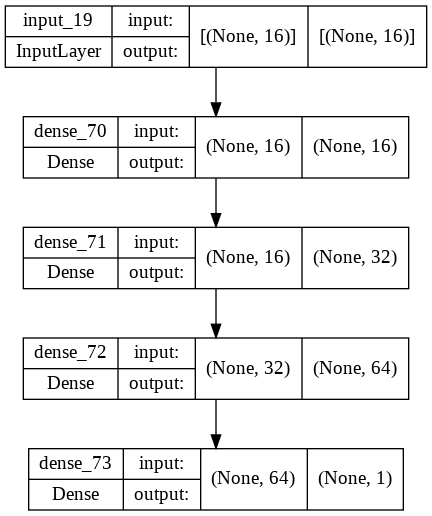

In [408]:
model_y = keras.Model(input, output)
plot_model(model_y, show_shapes=True)

In [409]:
model_y.compile(optimizer='adam', loss='MSE', metrics=['MeanSquaredError'])
early_stopping_callback = EarlyStopping(patience=15, restore_best_weights=True)
model_y.fit(x_train_y, y_train_y, batch_size=64, epochs=250, validation_split=0.1, callbacks=[early_stopping_callback])

Epoch 1/250
2/2 [==============================] - 1s 334ms/step - loss: 148.8288 - mean_squared_error: 148.8288 - val_loss: 133.0402 - val_mean_squared_error: 133.0402
Epoch 2/250
2/2 [==============================] - 0s 51ms/step - loss: 146.5324 - mean_squared_error: 146.5324 - val_loss: 130.8790 - val_mean_squared_error: 130.8790
Epoch 3/250
2/2 [==============================] - 0s 55ms/step - loss: 144.4802 - mean_squared_error: 144.4802 - val_loss: 128.8332 - val_mean_squared_error: 128.8332
Epoch 4/250
2/2 [==============================] - 0s 53ms/step - loss: 142.5725 - mean_squared_error: 142.5725 - val_loss: 126.8845 - val_mean_squared_error: 126.8845
Epoch 5/250
2/2 [==============================] - 0s 46ms/step - loss: 140.6116 - mean_squared_error: 140.6116 - val_loss: 124.9929 - val_mean_squared_error: 124.9929
Epoch 6/250
2/2 [==============================] - 0s 51ms/step - loss: 138.7644 - mean_squared_error: 138.7644 - val_loss: 123.1153 - val_mean_squared_error: 

In [410]:
prediction_y=model_y.predict(x_test_y[:1])
prediction_y

array([[8.078906]], dtype=float32)

In [411]:
weather_y['avgtempC'].iloc[-1]

8

#####Ez a predikció egész korrektnek tűnik, bár nagyon eltérő eredményeket adott többszöri futtatásra :/

In [412]:
model_y.evaluate(x_test_y, y_test_y)

1/1 [==============================] - 0s 32ms/step - loss: 16.5572 - mean_squared_error: 16.5572


[16.5572452545166, 16.5572452545166]